<a href="https://colab.research.google.com/github/pranavamshu4/Machine-learning/blob/master/Sol1_Linear_Regression_pranav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [3]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [6]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(20)


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
# Summary of data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

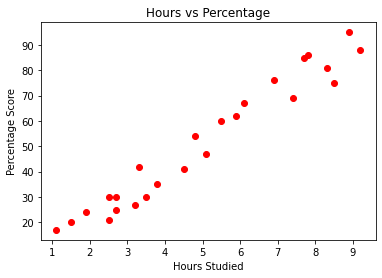

In [9]:
# Plotting the distribution of scores
plt.scatter(data.Hours, data.Scores,  color='red') 
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [10]:
#Dividing the data into "attributes" (inputs) and "labels" (outputs)
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [11]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [12]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [14]:
#Splitting the Dataset into Training and Test Set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 


In [16]:
# Training the model
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete.")
print('Linear model coeff (w): {}'
     .format(regressor.coef_))
print('Linear model intercept (b): {:.3f}'
     .format(regressor.intercept_))
print('R-squared score (training): {:.3f}'
     .format(regressor.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(regressor.score(X_test, y_test)))

Training complete.
Linear model coeff (w): [9.91065648]
Linear model intercept (b): 2.018
R-squared score (training): 0.952
R-squared score (test): 0.945


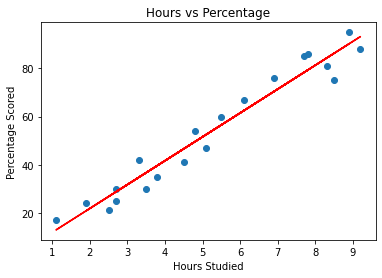

In [19]:
# Plotting the Regression Line
plt.scatter(X_train,y_train)
plt.plot(X_train, regressor.predict(X_train),color='red')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

In [20]:
#Making predictions
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [22]:
# Comparing Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [23]:
# You can also test with your own data

hours =np.array([[9.25]])
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


In [26]:
#Evaluating the model
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


In [39]:
#Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9270269738644744

**EXTRA:
Polynomial regression model**

In [43]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [44]:
#Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly1 = poly_reg.fit_transform(X_train1)
regressor = LinearRegression()
regressor.fit(X_poly1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
#Predicting the Test set results
y_pred1 = regressor.predict(poly_reg.transform(X_test1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test1.reshape(len(y_test1),1)),1))

[[19.36 20.  ]
 [31.37 27.  ]
 [79.1  69.  ]
 [25.28 30.  ]
 [62.88 62.  ]]


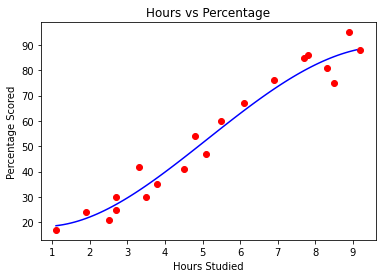

In [46]:
#Visualising the Polynomial Regression results 
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train1, y_train1, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

In [47]:
#Predicting a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform([[9.25]]))

array([88.53])

In [48]:
#Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test1, y_pred1)

0.9270269738644744